# Simple examples of hyperspectral data manipulation

In [ ]:
# Import some useful packages
import os
import matplotlib
import matplotlib.pyplot as plt
import spectral.io.envi as envi
import numpy as np

from plotly.subplots import make_subplots # used for 3D tetrahedral plots
import seaborn as sns # 2d KDE plots, can also make 2d scatter plots coloring by factor
import pandas as pd # used to generate dataframes/csvs of spectra
from PIL import Image # used to generate tiff image

# import the hsi package, containing some handy functions for animal color research 
import hsi.tetra as tetra
import hsi.utils as utils
import hsi.triangle as triangle
# many rely on the useful colour-science and spectral python packages, as well as scipy, sklearn, plotly, matplotlib and many more

# set some defaults for plotting
%matplotlib inline
matplotlib.rcParams['font.serif'] = "Times New Roman"
matplotlib.rcParams['font.family'] = "serif"


In [5]:
# define location for Gouldian finch header file and bil file. Note: requires a full, not a relative filepath
datadir = "../dat/Gouldian/"
hdrfile = datadir + "/Gouldian_finch_side.bil.hdr"
bilfile = datadir + "/Gouldian_finch_side.bil"

In [7]:
# Load the hyperspectral image as memfile (so we don't need to load it into memory)
img = envi.open(hdrfile, bilfile) # see https://www.spectralpython.net/fileio.html
# It can be useful to collect the wavelength bands from the image for later use
owl = img.bands.centers
print(img.shape)

(1368, 537, 294)


[ 0.4775  0.5629  0.6521  0.6991  0.499   0.5688  0.6182  0.5427  0.5975
  0.6609  0.5757  0.5979  0.5954  0.6772  0.4832  0.6392  0.4848  0.6052
  0.5234  0.6157  0.4178  0.4065  0.429   0.4062  0.3395  0.3198  0.3215
  0.3469  0.3108  0.2987  0.2453  0.2691  0.2799  0.2591  0.2515  0.2784
  0.2642  0.2717  0.286   0.2877  0.3118  0.3045  0.2836  0.2866  0.2823
  0.296   0.3078  0.326   0.3233  0.3254  0.3105  0.3158  0.352   0.3441
  0.3579  0.3583  0.3942  0.4281  0.4358  0.4512  0.4066  0.4063  0.389
  0.4027  0.4185  0.4141  0.4386  0.4987  0.5075  0.4997  0.4839  0.467
  0.4991  0.4677  0.462   0.4863  0.4955  0.4916  0.5046  0.5391  0.5149
  0.5036  0.4871  0.4619  0.4782  0.4667  0.4457  0.4392  0.4595  0.4975
  0.5176  0.5283  0.5362  0.5444  0.4969  0.4462  0.396   0.3713  0.3738
  0.3744  0.374   0.3328  0.3368  0.3293  0.339   0.3364  0.285   0.2805
  0.2866  0.2767  0.277   0.2719  0.2664  0.2546  0.2283  0.2171  0.2154
  0.2132  0.2088  0.1987  0.1898  0.1741  0.1667  0.1

Text(0, 0.5, 'Value (0-1)')

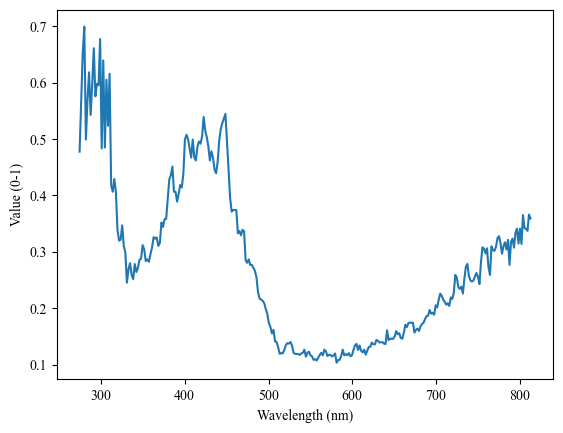

In [8]:
# Individual pixels of the hyperspectral image may be accessed easily
print(img[500,300,])
plt.plot(owl, img[500,300,])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Value (0-1)")

Image of the 461.61 nm band


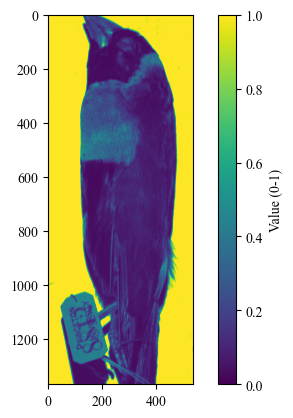

In [9]:
# individual bands of the image may also be easily accessed, here the nth band
n = 100
plt.imshow(img[:,:,n],  vmin = 0, vmax = 1) # the 50th band
plt.colorbar(label="Value (0-1)")
print('Image of the ' + str(owl[n]) + ' nm band')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


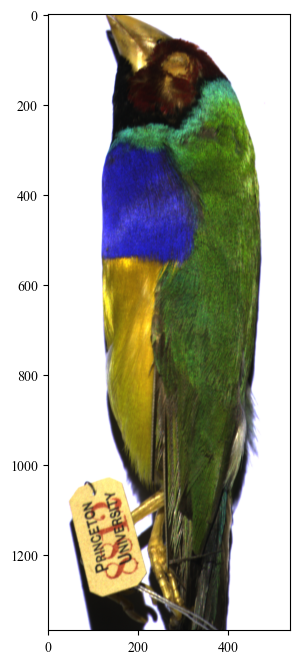

In [10]:
# Plot a example false color image of the file
# Here we're picking single wavelength bands to represent the red, green, and blue channels
# Since this image does not contain a reflectance standard, we use np.nan rather than a spectrum corresponding to the standard
# We use normalize_max to control the exposure of the image, this sets the reflectance (0-1) white point - or value that corresponds to RGB (1,1,1)
fig, ax, rgb_im = utils.PlotFalseRGB(img, r = 600., g = 550., b = 425., standard_100 = np.nan, plotme = True, normalize_max = .7)
# note we're storing this image as rgb_im so we can use these colors later on

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


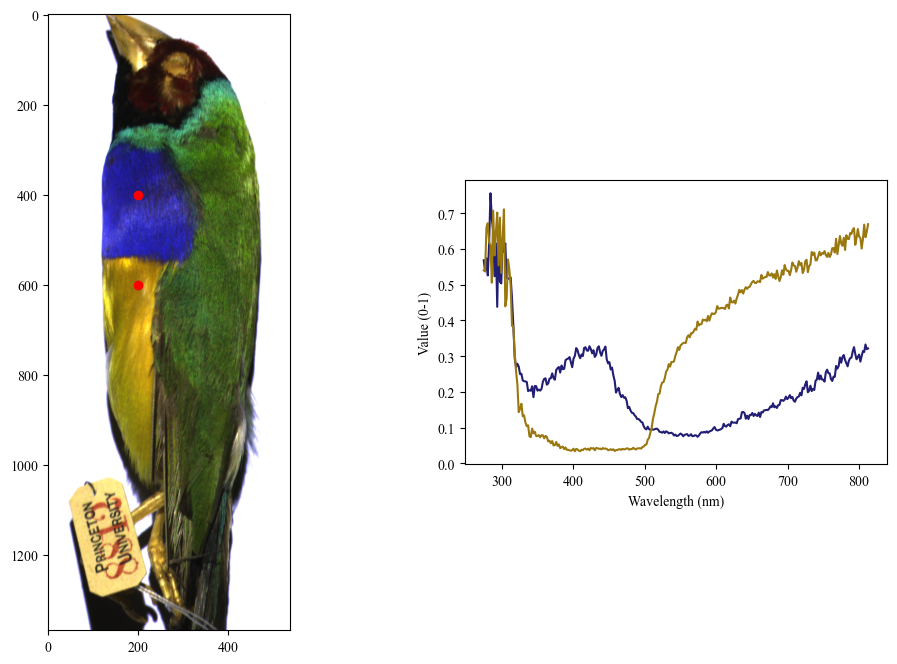

In [11]:
# Lets extract and plot some points of interest given the above
y = [400, 600]
x = [200, 200]

# Init empty n sample by wl array
Specs = np.empty((len(x), len(img.bands.centers)))
Specs[:] = np.NaN
RGBs = np.empty((len(x), 3))

# Load each point in a loop, it is also possible to load defined sections with for instance 
# img.read_subregion(col_bounds = [xmi, xma], row_bounds = [ymi, yma], use_memmap=True)
for i in range(Specs.shape[0]):
    Specs[i,:] = img[y[i], x[i], :].flatten()
    # lets grab out the R,G,B levels at those samples, for simplicity
    RGBs[i,:] = rgb_im[y[i], x[i]]

#### Plot those samples
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
# show sampled locations
ax[0].imshow(rgb_im);
ax[0].scatter(x,y, c = 'red');
# Plot the spectra
for i in range(len(x)):
    ax[1].plot(owl, Specs[i,:], color = RGBs[i]) # color spectra by the rgb from the image
    
ax[1].set_xlabel('Wavelength (nm)')
ax[1].set_ylabel('Value (0-1)')
ax[1].set_aspect(500)

Samples need averaging
Processing and averaging


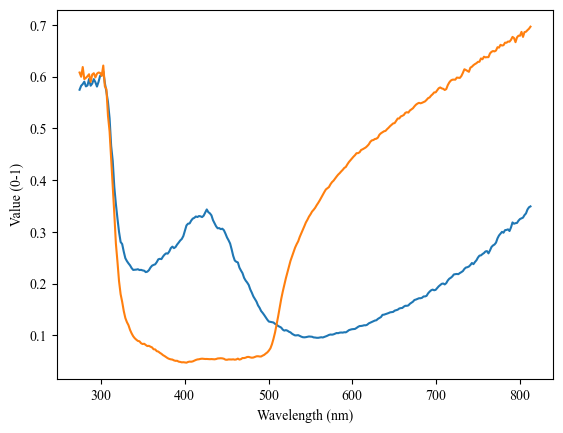

In [12]:
## Alternatively, use hsi's utility function to sample the same locations
# but with convenient spatial sampling (here a 21 x 21 block of pixels is averaged (x-n:x+n, y-n:y+n))
# this also conveniently places them in a sample x wavelength numpy array
Specs = utils.ReadBands(img, x, y, 10)
utils.PlotSpec(Specs = Specs, wl = img.bands.centers, ylabel = "Value (0-1)")

In [13]:
# We can save the kinds of spectra out for use in spectrum based analyses like pavo
r_spec = pd.DataFrame(Specs.T, index = img.bands.centers)
r_spec.columns = ['a', 'b']
r_spec.to_csv("../out/Ranalysis/example_spec.csv")

In [14]:
# Or 'pickle' (serialize) the data for later use 
utils.pick("../out/example_pickle.pkl", what = [owl, Specs], ls = 'save') # saving
[loaded_owl, loaded_Spec] = utils.pick("../out/example_pickle.pkl", ls = 'load') # loading
# show that loaded and saved are identical
print(loaded_owl == owl) 
print((loaded_Spec == Specs).all())

True
True


Samples need averaging
Processing and averaging


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


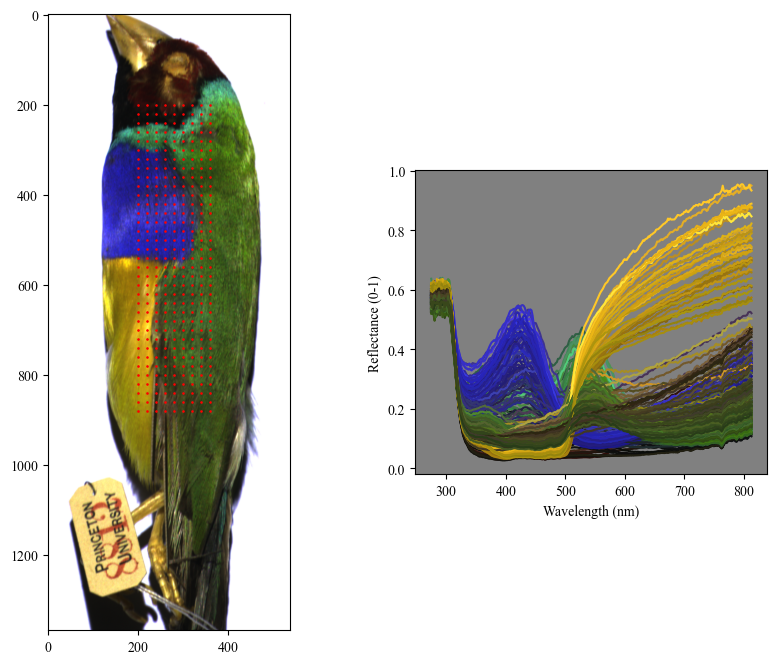

In [15]:
# lets define a region to sample from instead of individual points
xmi, xma = [200, 370]
ymi, yma = [200, 900]

# alternatively, could sample whole image
# xmi, xma = [0, img.shape[1]]
# ymi, yma = [0, img.shape[0]]

# or one could load a whole region (i.e. every pixel, rather than a sample of pixels):
# Specs = img.read_subregion(col_bounds = [xmi, xma], row_bounds = [ymi, yma], use_memmap=True)
# Specs = Specs.reshape([Specs.shape[0]*Specs.shape[1],Specs.shape[2]])

# We'll define a square grid of samples within the rectangular region we've defined
gap = 20
x = np.arange(xmi, xma, step = gap)
y = np.arange(ymi, yma, step = gap)
xx, yy = np.meshgrid(x,y)
xx = xx.flatten()
yy = yy.flatten()

# Read the spectra, get ready to copy colors from the falsecolor image
Specs = utils.ReadBands(img, xx, yy, 10)
RGBs = np.empty((len(xx), 3))

# Grab the rgb falsecolors at the relevant locations in loop
for i in range(Specs.shape[0]):
    RGBs[i,:] = rgb_im[yy[i], xx[i]]
RGBs[RGBs>1]=1

# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
# Plot sampled locations
ax[0].imshow(rgb_im);
ax[0].scatter(xx, yy, s = 0.75, c = 'r');
# Plot the spectra
for i in range(len(xx)):
    ax[1].plot(owl, Specs[i,:], color = RGBs[i]) # color spectra by the rgb from the image
ax[1].set_xlabel('Wavelength (nm)')
ax[1].set_ylabel('Reflectance (0-1)')
ax[1].set_aspect(500)
ax[1].set_facecolor("gray")

In [16]:
# We can interpolate the spectra to 1nm and remove <325nm and >700
int_wl, int_Specs = utils.InterpSample(owl, Specs, wlnew = np.arange(325, 700, 1))
# one can apply extrapolation and smoothing with utils.InterpExtrapSample (or by coding smoothing and extrapolation, see scipy for many useful algorithms)

Generating colors
Sample in colour-science format
Colors generated


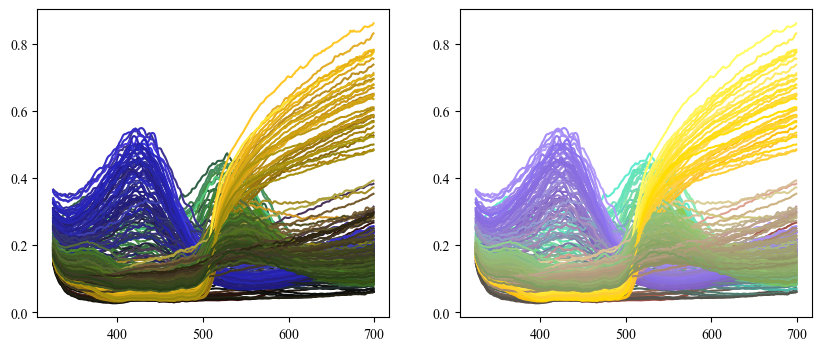

In [17]:
# Rather than using false-colors from only 3 bands, we can calculate CIE XYZ coordinates using the spectra,
# and then convert these to sRGB and CIELab for better color accuracy (remember that we control the exposure of the falsecolor image).
XYZ, sRGB, Lab = utils.GetColors(int_Specs, int_wl, color_scale = 2) # can be slow

# And plot those values to see the difference (if any)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k')

# Plot the spectra
for i in range(len(xx)):
    ax[0].plot(int_wl, int_Specs[i,:], color = RGBs[i]) # color spectra by the rgb from the image
    ax[1].plot(int_wl, int_Specs[i,:], color = sRGB[i]) # color spectra from CIE calculations

In [18]:
# Additionally, we might be interested in how these spectra would stimulate avian cones
# The example code in utils.Spec2usml is hard-coded to use an average vs bird visual system - but 
# similar code should work for your species of interest. The example code also omits background and illumination 
# (in effect assuming ideal background and illumination), so if you want to use those parameters you'll want to 
# generate your own version. Or extract the spectra of interest and use pavo.

# We generate absolute and relative stimulations, as well as calculating the xyz position of the color in tetrahedral color space
usml, relusml, txyz = utils.Spec2usml(int_Specs, int_wl)
# Throughout we assume a typical tetrachromatic avian system, but the code could easily be expanded to other animal visual systems

Got USML + relative USML


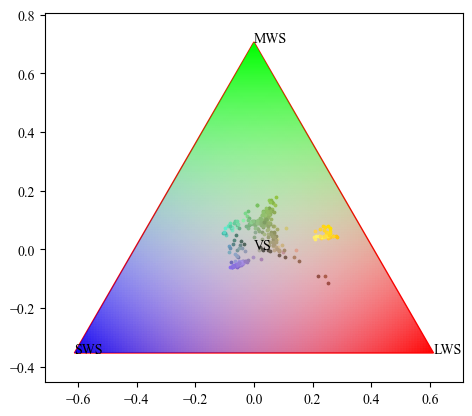

In [19]:
# We can plot those colors in tetrahedral space in 2D:

# Define vertexes of the tetrahedron
v = np.array([[0, 0, .75], 
     [-.61237, -.35355, -.25], 
     [0, .70711, -.25], 
     [.61237, -.35355, -.25]]) 
vlab = np.array(['VS', 'SWS', 'MWS', 'LWS']) # label the vertexes as we want

# rotate xyz coordinates, and label coordinates to have 'u' (ultraviolet) pointing toward us
rv = triangle.RotateXYZtoTop(v, up = 'u')
pltd = triangle.RotateXYZtoTop(txyz, up = 'u')

# Plot triangle
fig, ax = plt.subplots(1)
triangle.MakeTriangle(ax, rv, vlab, lab_colors = np.array([[1,0,1],
                                                           [0,0,1],
                                                           [0,1,0],
                                                           [1,0,0]]), fcolor = 'RGB', ecolor = 'red', ann = 1)

# scatter our colors in the space
for i in range(len(xx)):
    ax.scatter(pltd[i,0], pltd[i,1], s = 3, color = sRGB[i]) 

<Axes: >

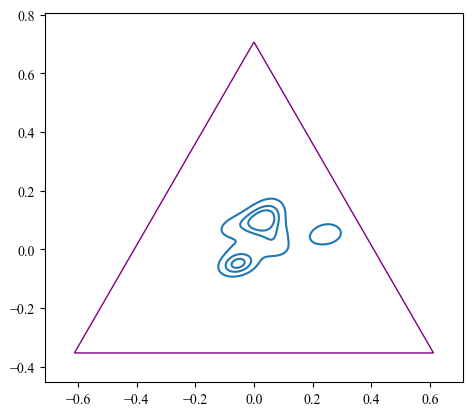

In [20]:
# We might be interested in plotting the kernel density of the colors in the color space:
fig, ax = plt.subplots(1)
triangle.MakeTriangle(ax, rv, vlab, fcolor = 'None', ecolor = 'purple', ann = 0)
sns.kdeplot(x = pltd[:,0], 
        y = pltd[:,1], 
        fill=False, # False gives only contours, True gives filled zones
        thresh=0, 
        common_norm = False,
        legend=False,
        levels=[0.2, 0.6, 0.8, 1], 
        ax=ax)

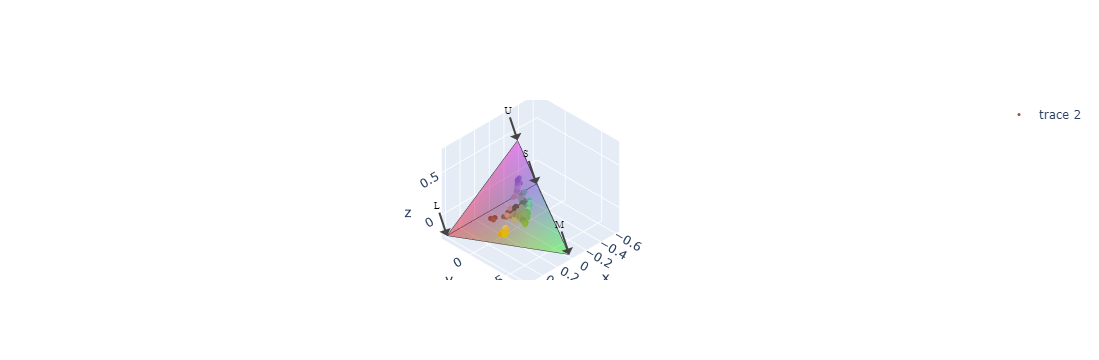

In [19]:
# Alternatively, we might be interested in an interactive 3D tetrahedral plot:
fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scene"}]])
tetra.tetra3d(fig)
sRGB[sRGB==1] = .999 # plotly plots values with sRGB = 1 as black, for some reason so we'll clamp a little below that
tetra.points3dColor(fig, txyz, sRGB = sRGB, msize = 3)
fig.show()

100%|██████████████████████████████████████████████████████████████████████████████| 1368/1368 [00:33<00:00, 41.39it/s]


float32


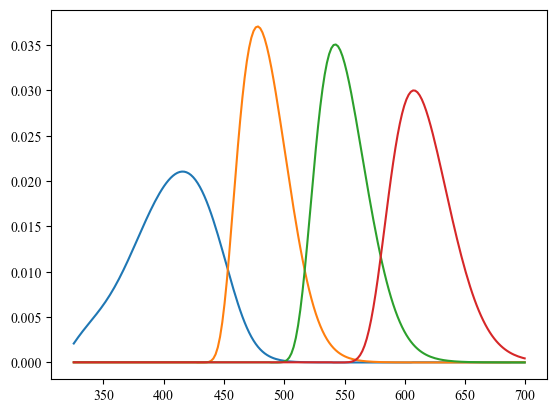

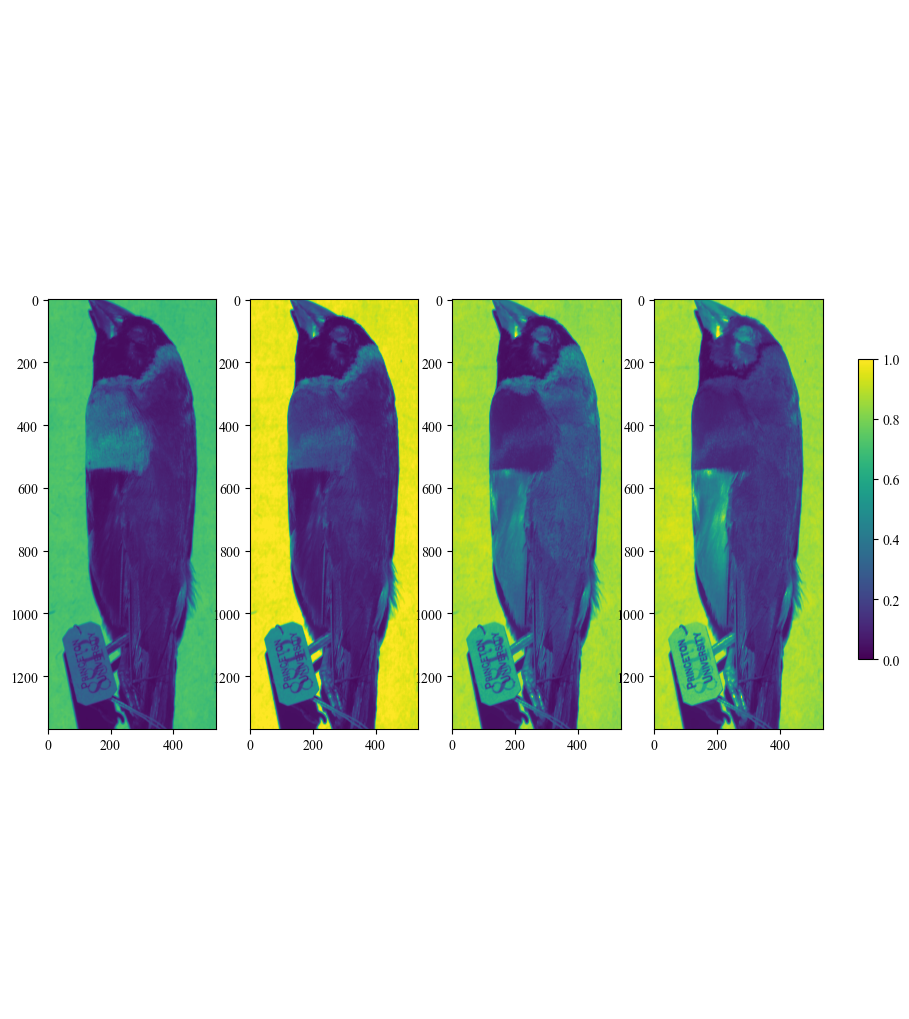

In [21]:
# Or, we might want to convert our whole image to a cone-stimulation image, compatible with MICA/QCPA:
# Here we're using the average vs bird, and as above we're including a very simplified version of this modelling:
# ideal background and illuminant etc. Please only use this code as inspiration for your own uses.
# Equally, double-cone stimulation and sensntivities might be added.

# this package will let us display a progress bar
from tqdm import tqdm

# load visual sensitivity (in this case, average vs bird cone sensitivity)
df = pd.read_csv( '../dat/Sensi/Avg_v.csv', index_col=None).to_numpy()
wl = df[:,0]
df = df[:,1:]
owl = np.array(owl)

# interpolate visual sensitivity to wavelengths of 325>x<700, otherwise matching the band centers of the hyperspectral image
# an alternative might be to interpolate/extrapolate the entire hyperspectral image to match the extent of the sensitivities
wl, df = utils.InterpSample(wl, df.T, wlnew = owl[np.logical_and(owl > 325, owl < 700)])
df = np.divide(df, np.sum(df, axis = 1)[:,None]) # normalize sensitivities to area = 1

# plot sensitivites
plt.plot(wl, df.T)

# loop through pixels of our hyperspectral image, and for each find usml value (integration by multiplication)
nrows = img.shape[0]
ncols = img.shape[1]
chans = df.shape[0]
x_out = np.zeros((nrows, ncols, chans + 1)) # note that QCPA expects last channel to be luminance, which we don't use here, but could do if we added a 5th color sensitivity channel

# this could be vectorized to work on rows or columns in each iter
for i in tqdm(range(nrows)): # tqdm displays a timer for the processing
    for j in range(ncols): 
        x = img[i, j]
        x = x[np.logical_and(owl > 325, owl < 700)]
        x_out[i,j,0:chans] = np.sum(x * df, axis = 1) # integration by sum, here one could introduce an illuminant or background adaptation

# plot the resulting images
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (10,10))
vmin = 0
vmax = 1
a = ax[0].imshow(x_out[:,:,0], vmin = vmin, vmax = vmax)
ax[1].imshow(x_out[:,:,1], vmin = vmin, vmax = vmax)
ax[2].imshow(x_out[:,:,2], vmin = vmin, vmax = vmax)
ax[3].imshow(x_out[:,:,3], vmin = vmin, vmax = vmax)
cax = fig.add_axes([0.85, 0, 0.1, 1])
fig.colorbar(a, ax=cax)
cax.set_axis_off()

# make a version that is an unsigned 32 bit image and save it out
x_out_norm = x_out
x_out_norm[x_out_norm > 1] = 1 # clamp values
x_out_norm = x_out_norm * 2**32 # 32 bit values
x_out_norm = x_out_norm.astype('float32')
print(x_out_norm.dtype) 

im = Image.fromarray(x_out_norm[:,:,0])
imlist = []
for m in range(x_out_norm.shape[2]):
    imlist.append(Image.fromarray(x_out_norm[:,:,m]))

# save that out as a multi-page tiff to use in mica/QCPA
imlist[0].save("../out/test.tif", compression="None", save_all=True,
               append_images=imlist[1:])

In [22]:
# Going back to our spectra, we might be interested if they cluster in some way. Here we'll apply PCA to them:
pca = utils.EmbedPCA(int_Specs, subtract_mean = False) # here we do not subtract the mean of each spectrum
# and generate a UMAP embedding of the PCA coordinates to help us plot them
pca_umap_embedded = utils.EmbedDist(Coordinates = pca, verbose = 0)
# please see UMAP documentation for more details, including the main parameters, and appropriate-ness for your scientific question.

Computing umap on coordinates
UMAP done in 10.098417043685913


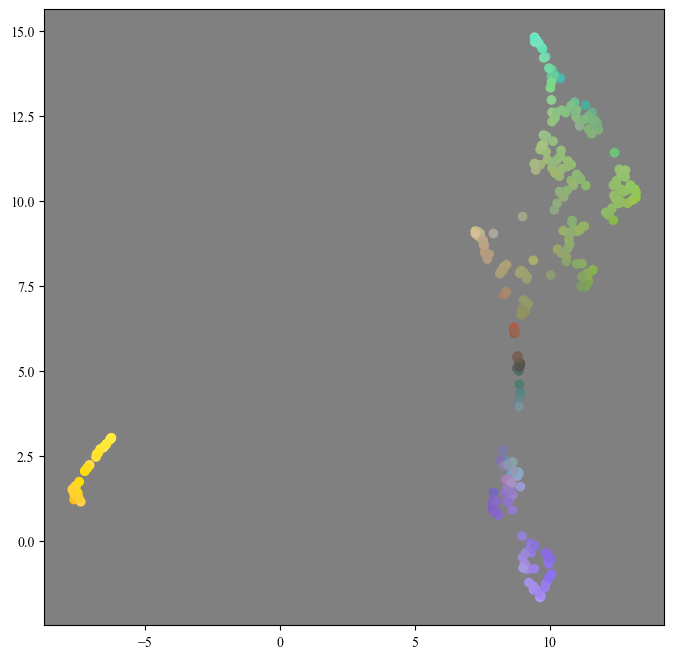

In [23]:
# Plot that UMAP embedding
fig, ax = plt.subplots(figsize = [8,8])
ax.set_facecolor([0.5,0.5,0.5])
ax.scatter(pca_umap_embedded[:,0], pca_umap_embedded[:,1], color = sRGB)

In [24]:
# We can measure distances between spectra in other ways. Here we'll calculate KLPD (as well as it's shape dSh and brightness dW components):
KLPD, dSh, dW = utils.GetKLPD(int_Specs)
# Note that these are calculated pairwise - so each of these outputs is a sample x sample distance matrix
print(KLPD.shape)
# So again, to take a look at these, we can use UMAP to embed them.
KLPD_umap_embedded = utils.EmbedDist(DistMatrix = KLPD)

100%|██████████████████████████████████████████████████████████████████████████████| 315/315 [00:00<00:00, 2272.76it/s]
C:\Users\bhogan\AppData\Local\anaconda3\envs\hsi\lib\site-packages\umap\umap_.py:1858: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


(315, 315)
Computing umap on distance matrix
UMAP(metric='precomputed', verbose=1)
Mon Sep  9 17:24:37 2024 Construct fuzzy simplicial set
Mon Sep  9 17:24:37 2024 Finding Nearest Neighbors
Mon Sep  9 17:24:40 2024 Finished Nearest Neighbor Search
Mon Sep  9 17:24:40 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Sep  9 17:24:43 2024 Finished embedding
UMAP done in 5.704334259033203


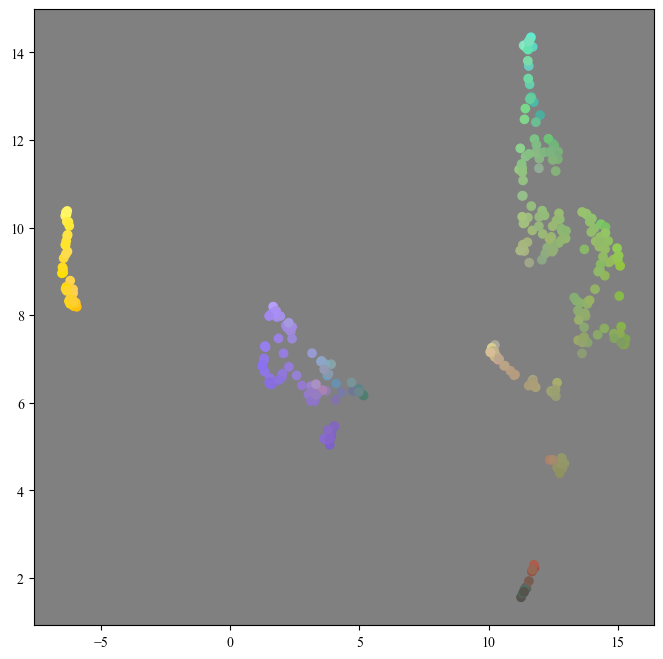

In [25]:
# And we may wish to plot that too:
fig, ax = plt.subplots(figsize = [8,8])
ax.set_facecolor([0.5,0.5,0.5])
ax.scatter(KLPD_umap_embedded[:,0], KLPD_umap_embedded[:,1], color = sRGB)

In [26]:
# Finally, lets make a nice montage of several bands of the hyperspectral image
custom_map = utils.GetCustomColormap() # generate a nice rainbow colormap 

# Define the grid for the montage
nrow = 1
ncol = 9
nwl = nrow * ncol
imw = img.shape[1]
imh = img.shape[0]
wwidth = ncol * (imw/imh)
wheight = nrow
wwidth = wwidth/wheight
wheight = wheight/wheight

# Work out which wavelength band images we'll want in our montage
minwl = 330
maxwl = 700
levs = np.linspace(minwl, maxwl, nwl)
levs = np.append(330, np.arange(350, 710, 50))
print(levs)
idxl = []
for i in levs:
    idxl.append(np.argmin(np.abs(owl - i)))
rgba = custom_map(np.linspace(0,1,len(levs)))


[330 350 400 450 500 550 600 650 700]


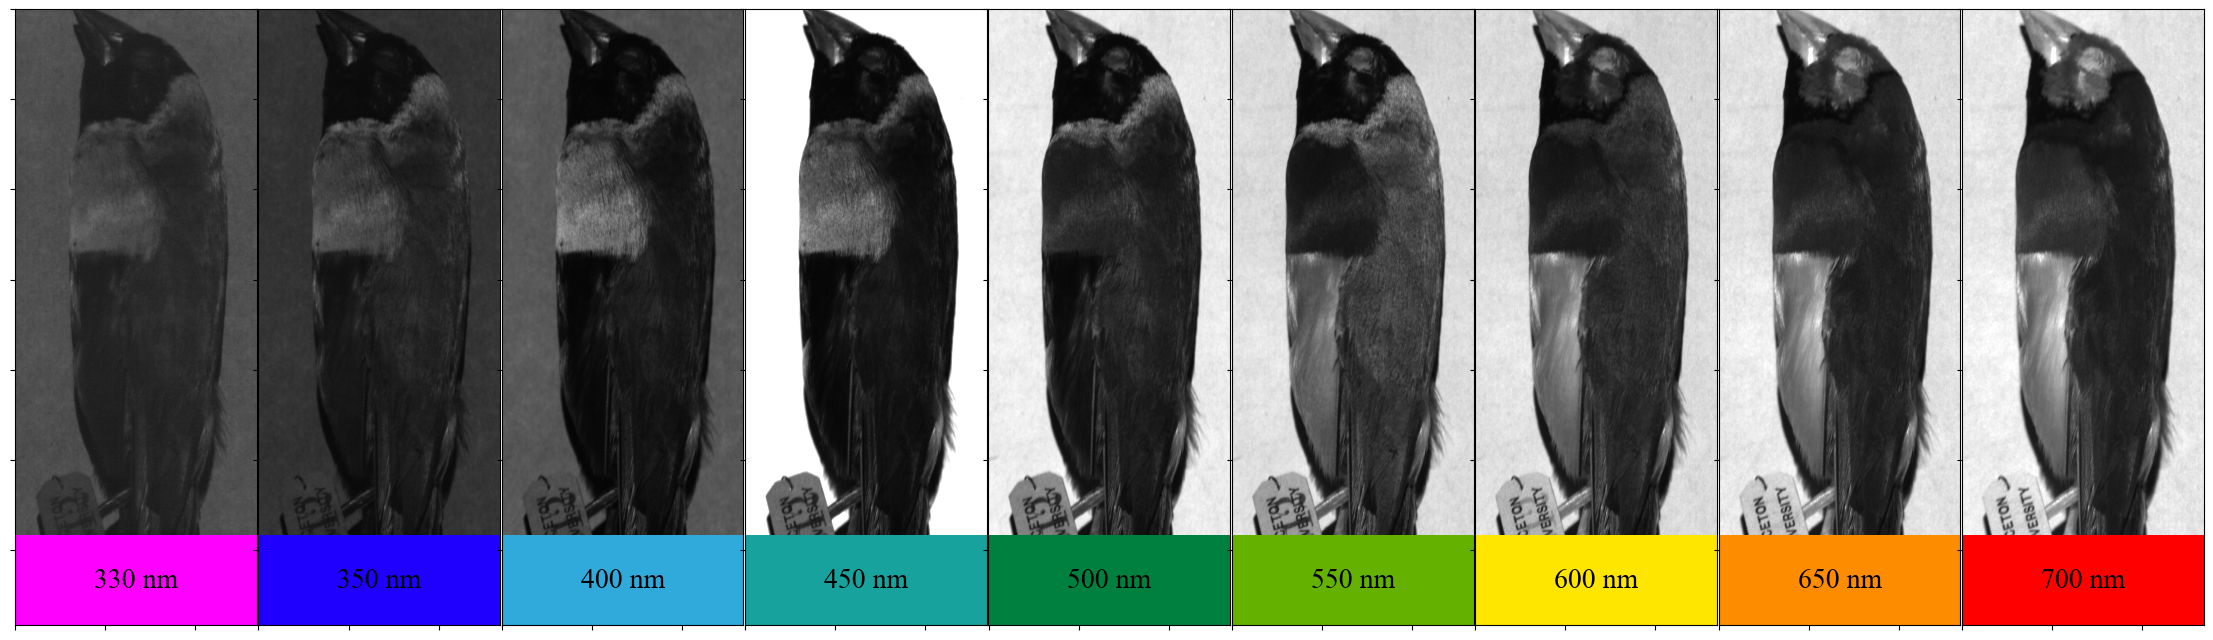

In [27]:
# plot our montage
fig, axs = plt.subplots(nrow, ncol, figsize=[wwidth * 8,wheight * 8], dpi=100, facecolor='w', edgecolor='k') # n by n*3.38
for i, ax in enumerate(fig.axes):
    
    # grab the image at each band closest to the selected wavelengths
    gray_img = img[:,:,int(idxl[i])]
    ax.imshow(gray_img, cmap='gray', vmin = 0, vmax = 1)

    # add rectangle with wavelenth label
    rect = plt.Rectangle((0,img.shape[0]-200), gray_img.shape[1], 200, facecolor=rgba[i])
    ax.add_patch(rect)
    ax.text(img.shape[1]/2, img.shape[0]-100,  str(levs[i].astype(int)) + " nm", verticalalignment = 'center', horizontalalignment='center', fontsize = 20)

    # format axes
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    
plt.subplots_adjust(wspace=0, hspace=0)

# fig.savefig('../Figures/Diagram/Montage_plot_gould.pdf', dpi = 200,bbox_inches='tight')